In [1]:
import os
from os.path import dirname

root_dir = dirname(os.getcwd())
os.chdir(root_dir)

In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
from src.nn.models import DengueNN

In [4]:
model = DengueNN(device=device, lr=1e-4)

In [5]:
hist = model.train(epochs=1000)

Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Solution: tensor([ 8.3630,  8.7260,  9.0890,  9.4520,  9.8150, 10.1780, 10.5410, 10.9041,
        11.2671, 11.6301, 11.9931, 12.3561, 12.7191, 13.0821, 13.4451, 13.8081,
        14.1711, 14.5341, 14.8971, 15.2601, 15.6231, 15.9862, 16.3492, 16.7122,
        17.0752, 17.4382, 17.8012, 18.1642, 18.5272, 18.8902, 19.2532, 19.6162,
        19.9792, 20.3422, 20.7052, 21.0682, 21.4313, 21.7943, 22.1573, 22.5203,
        22.8833, 23.2463, 23.6093, 23.9723, 24.3353, 24.6983, 25.0613, 25.4262,
        25.8512, 26.3123, 26.7797, 27.2481, 27.7167, 28.1854, 28.6541, 29.1228,
        29.5916, 30.0602, 30.5288, 30.9975, 31.4662, 31.9349],
       grad_fn=<SliceBackward0>)
Output: tensor([6.4421e-02, 5.5791e-04, 1.5924e-02, 9.5036e-01, 9.6927e-01, 7.9643e-04,
        1.0000e+00, 2.0745e-01, 3.3211e-06, 1.0000e+00, 6.6825e-04, 1.1610e-02,
        4.6319e-01, 1.0000e+00, 9.9932e-01, 9.1112e-01, 9.9985e-01, 6.3235e-05,
        1.0000e+00, 9.9988e-01, 1.4119e-05, 1.9849e-03, 9.2467e-01, 1.0000e+00,
      

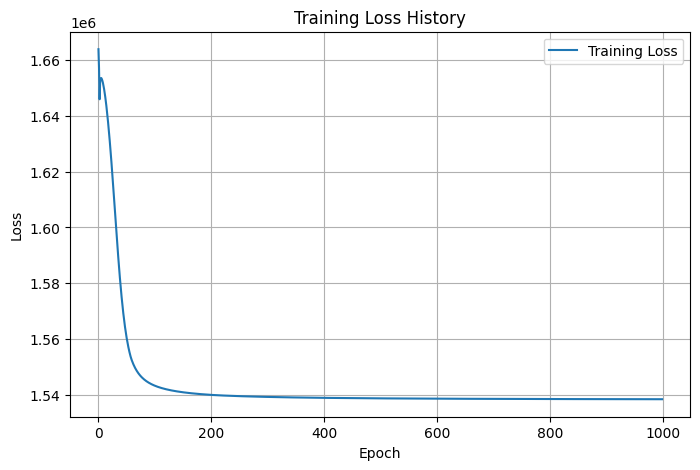

In [6]:
import matplotlib.pyplot as plt

# Plot loss history
plt.figure(figsize=(8, 5))
plt.plot(hist, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.legend()
plt.grid(True)
plt.show()